### Event Distribution of Mice with Time

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import direction_transition as dit
import paths

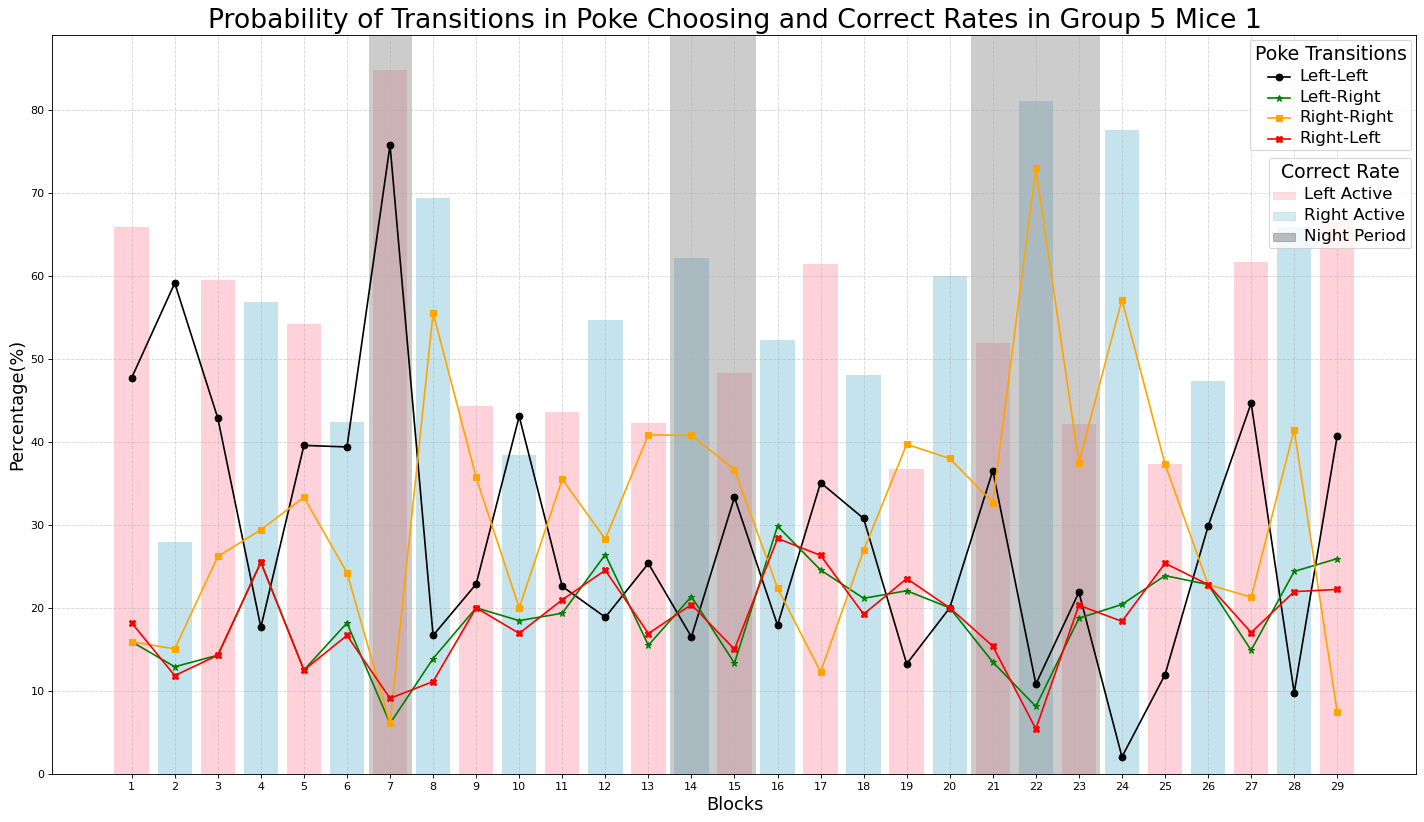

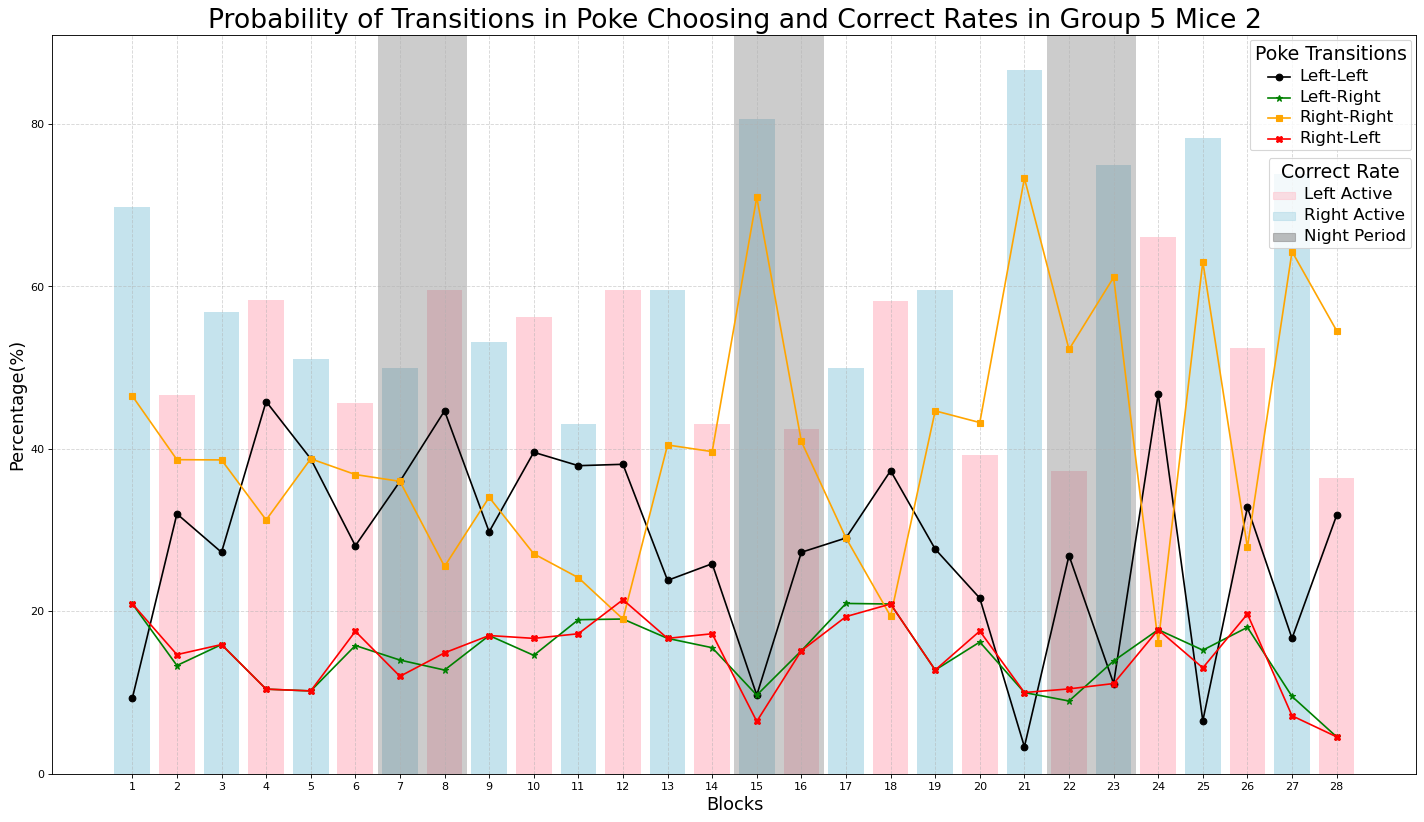

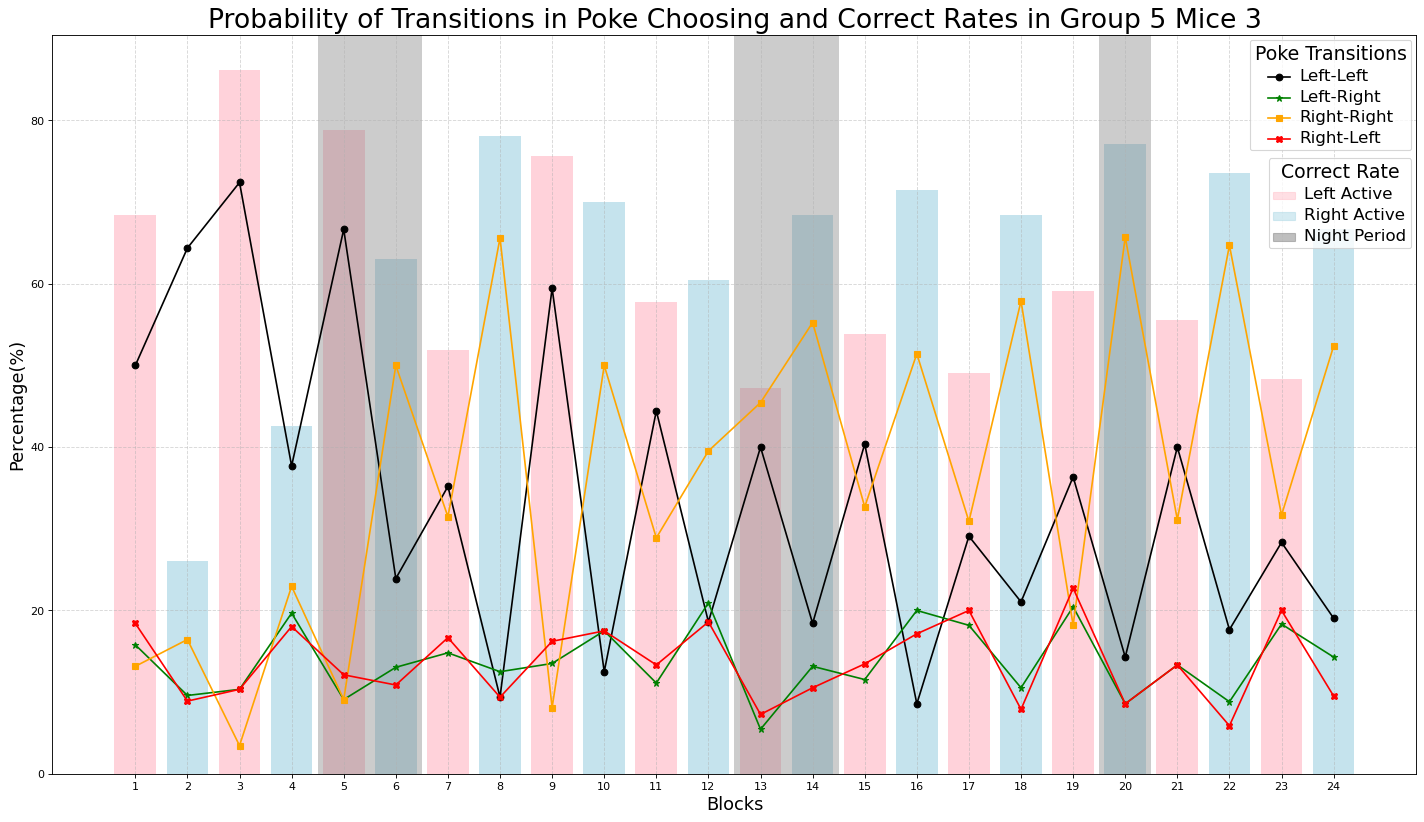

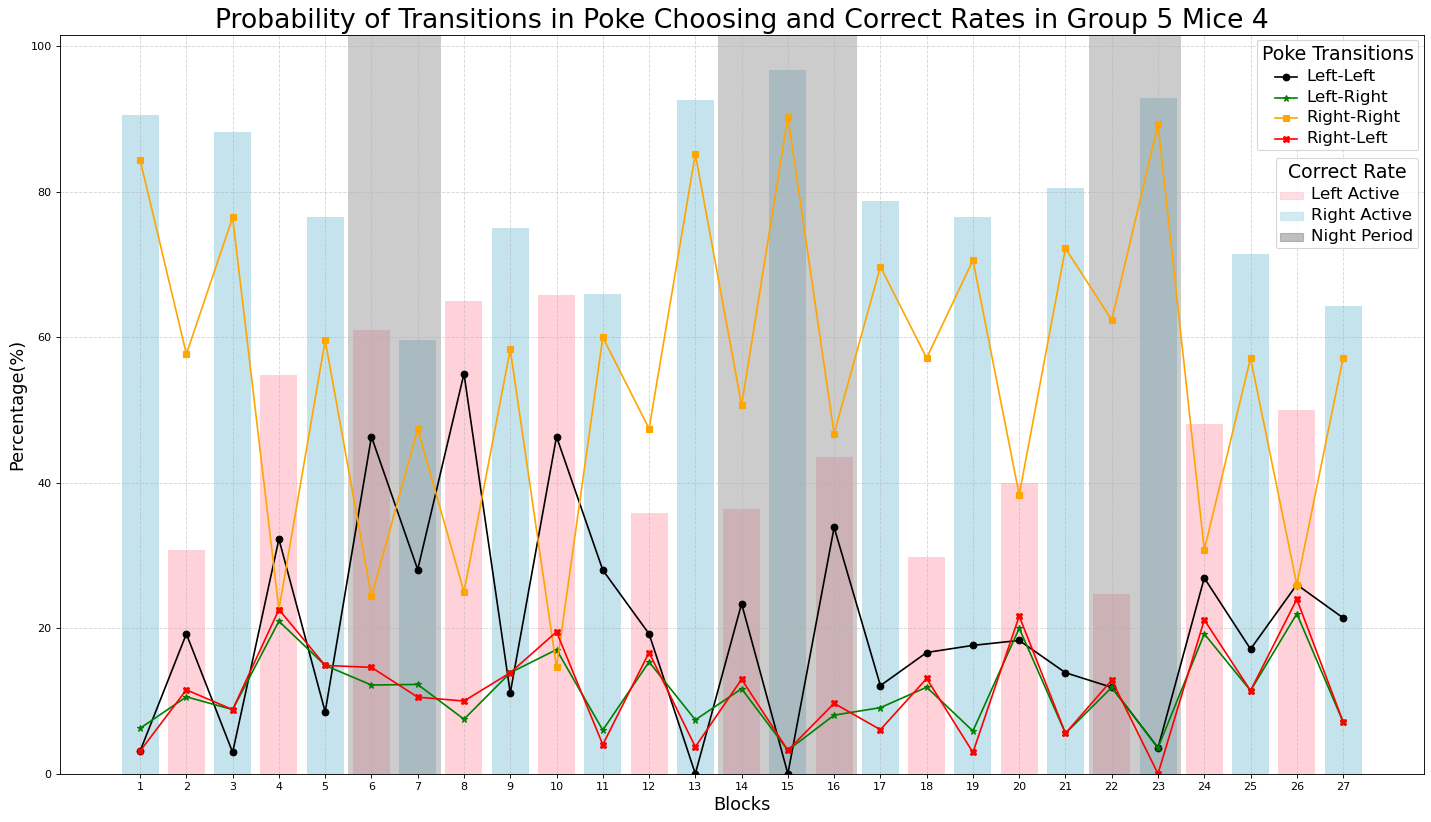

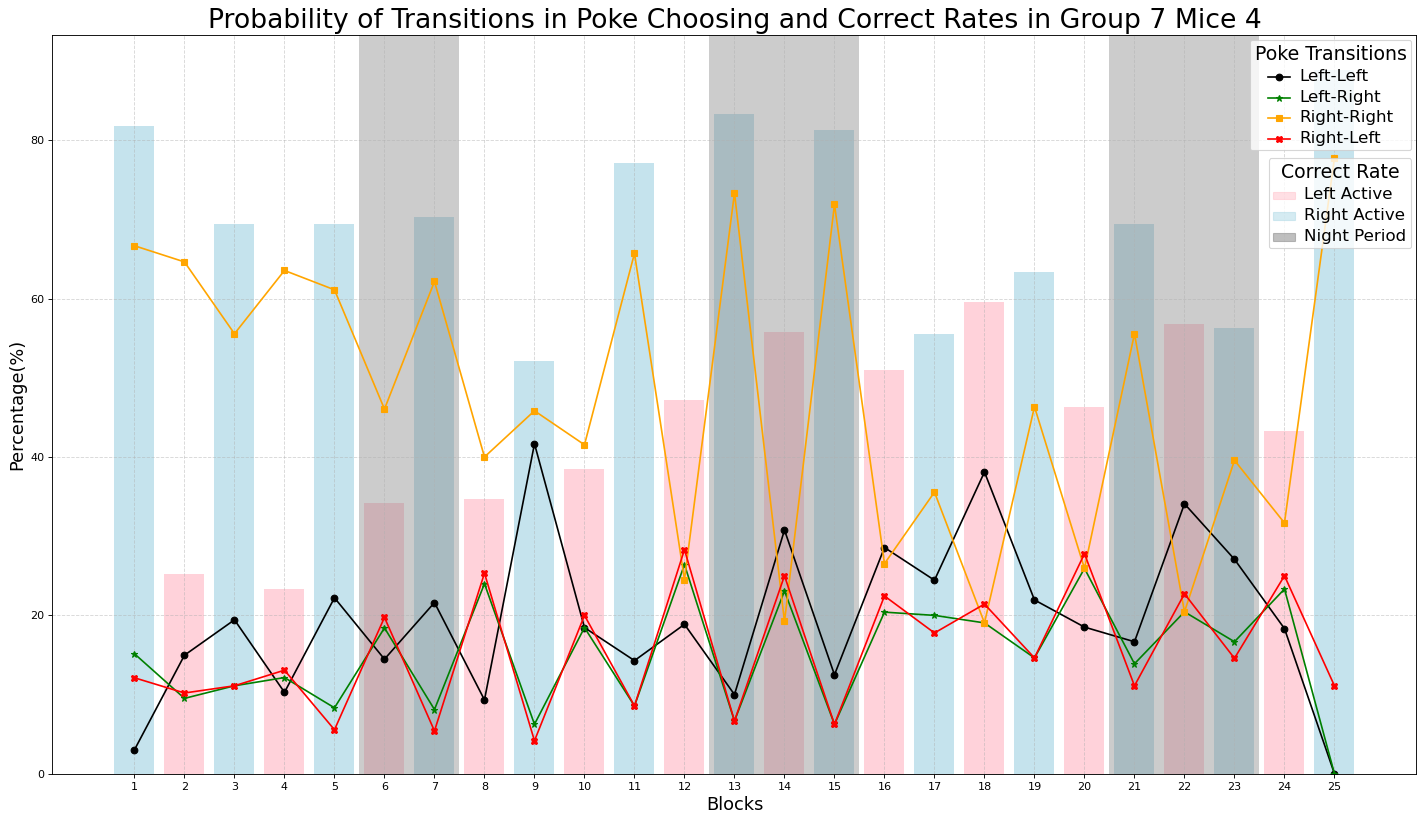

In [2]:
for path in paths.contigency_flip_ctrl:
    data_dropped = dit.csv_read_clean(path=path)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_csv(data_stats, blocks, path)

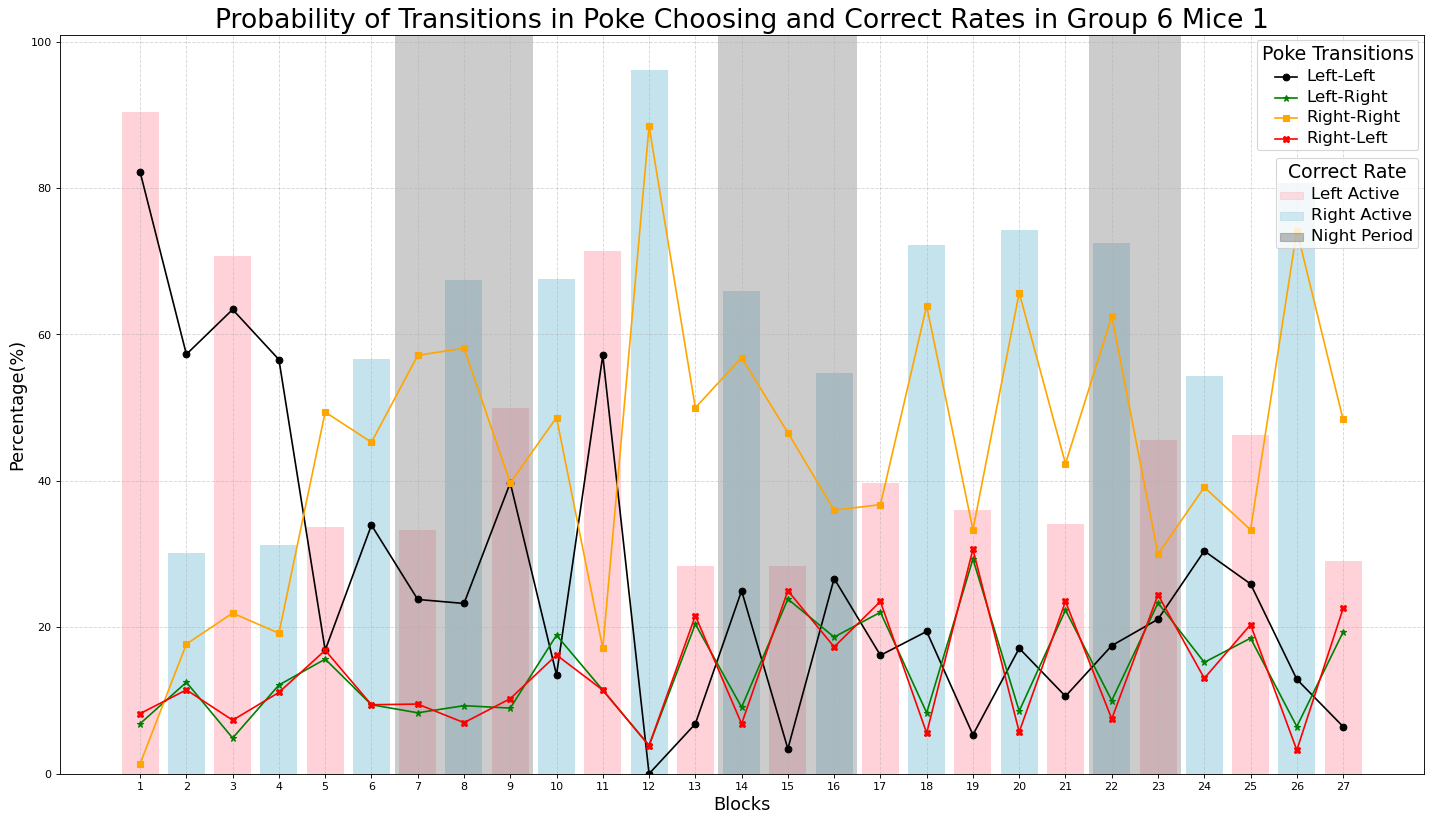

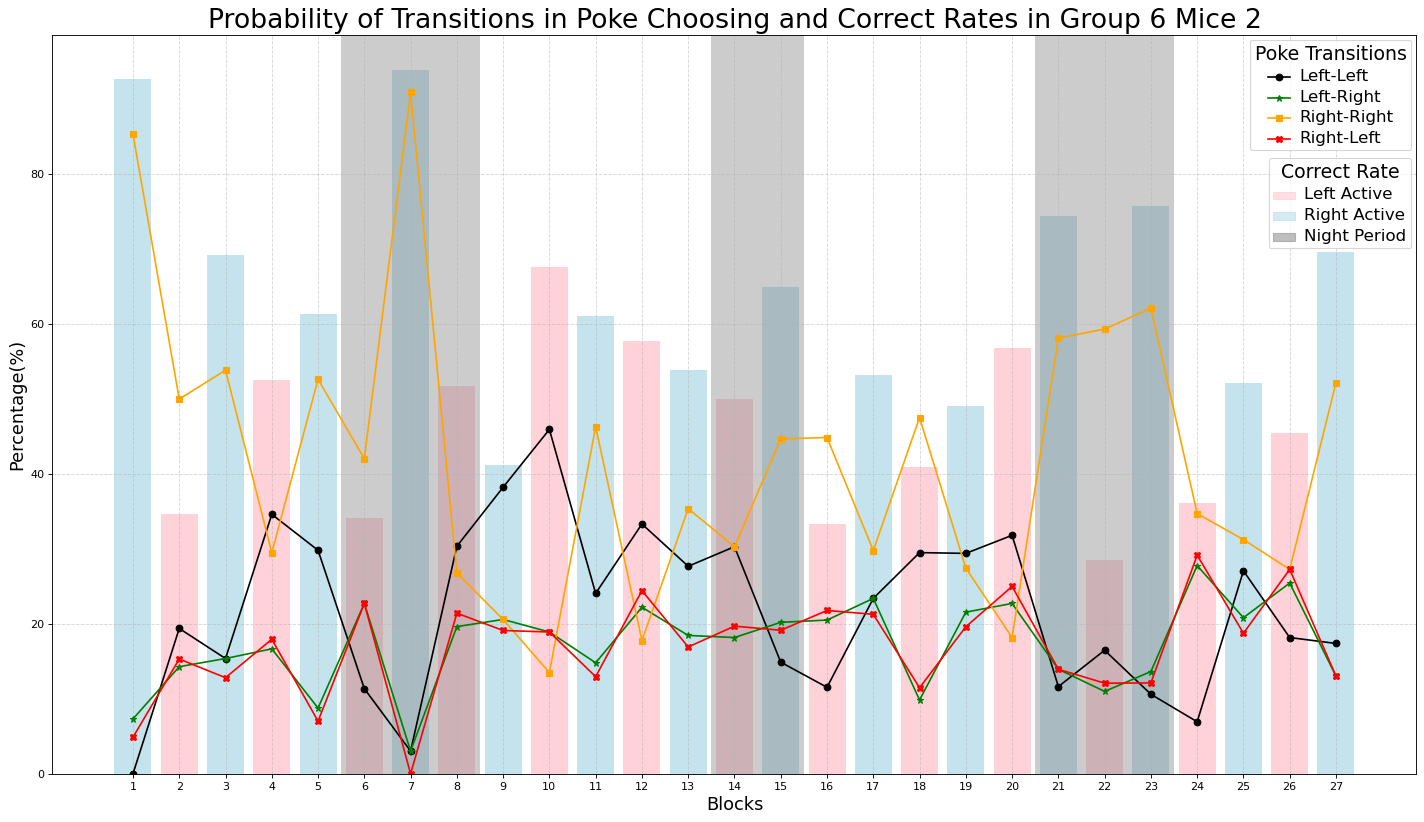

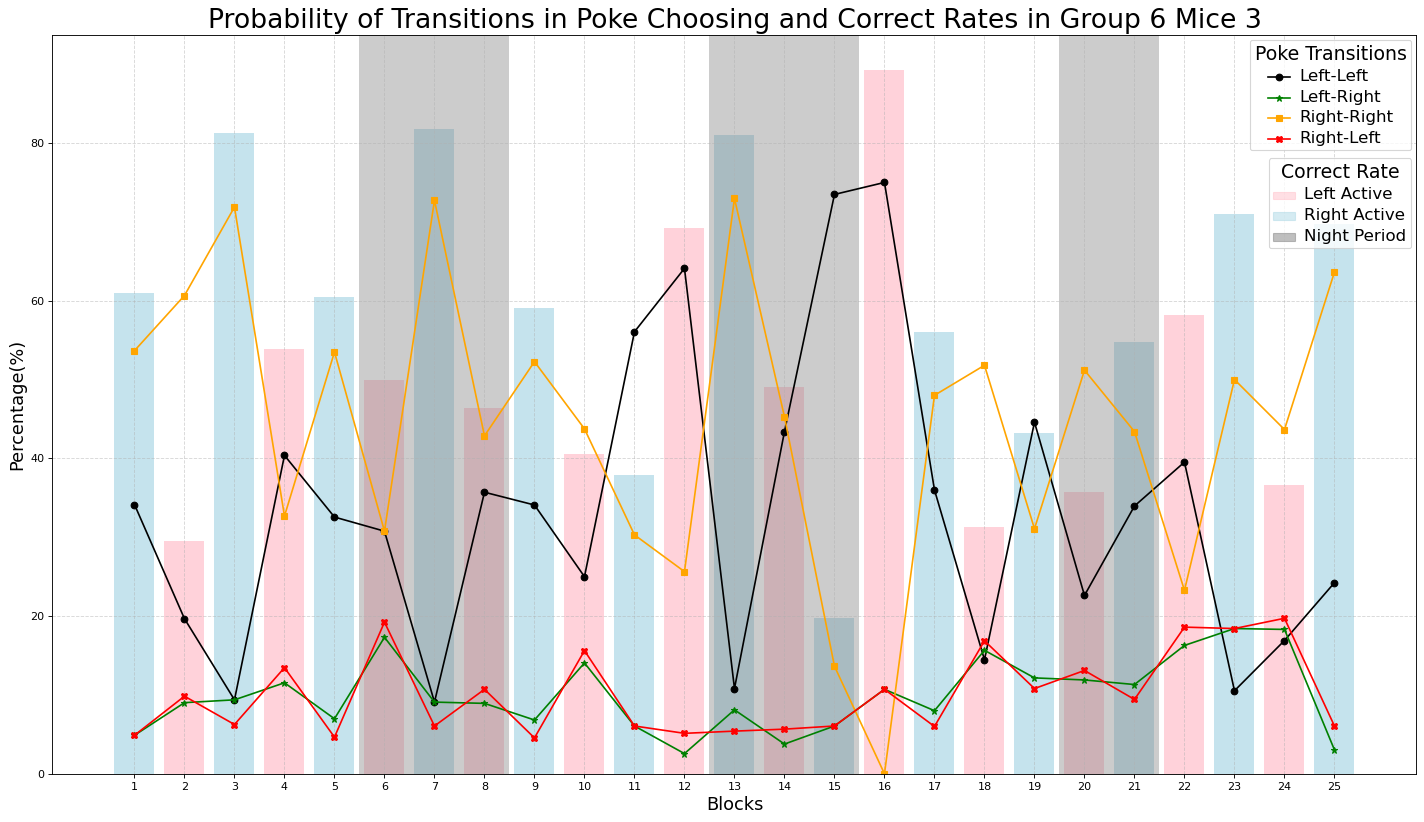

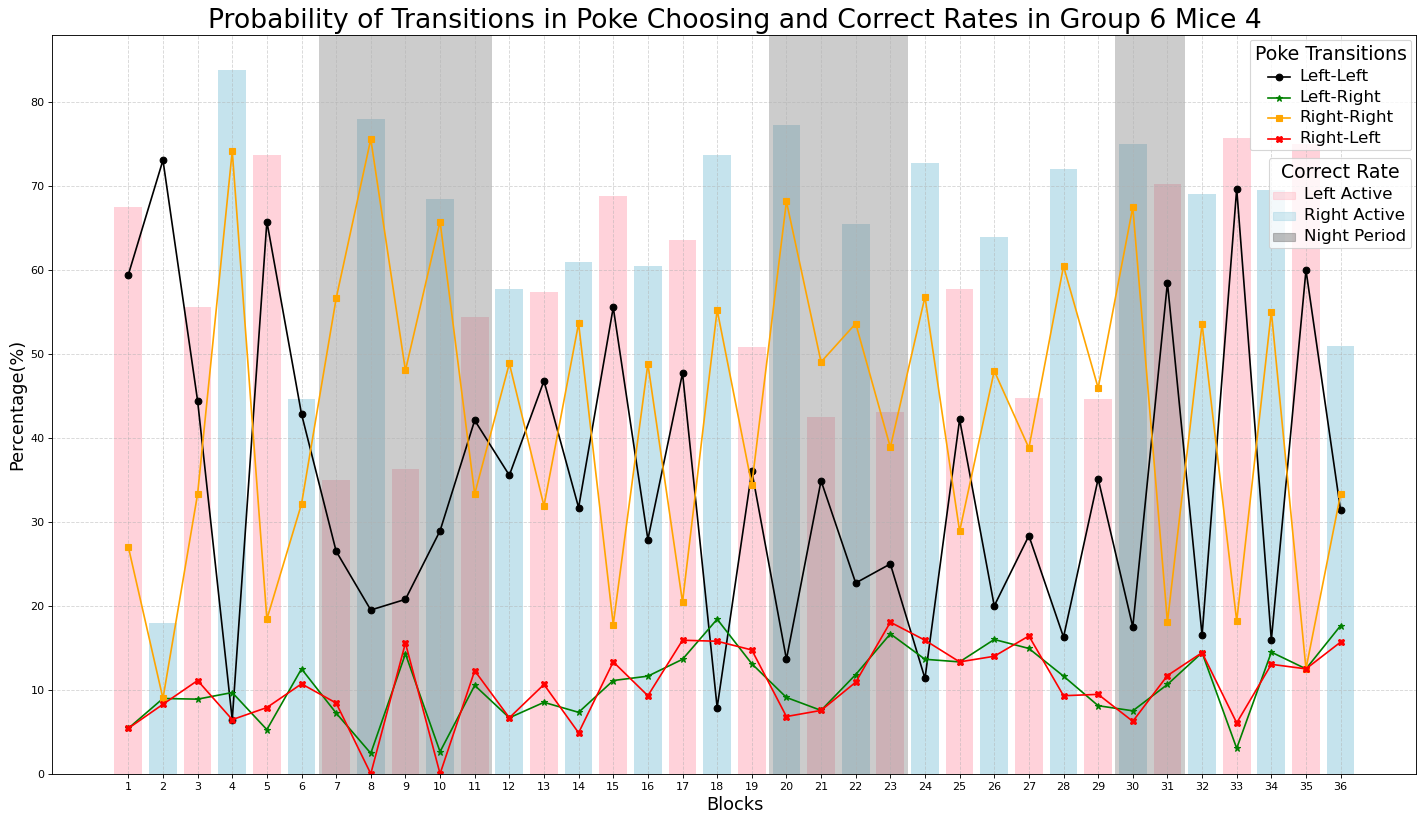

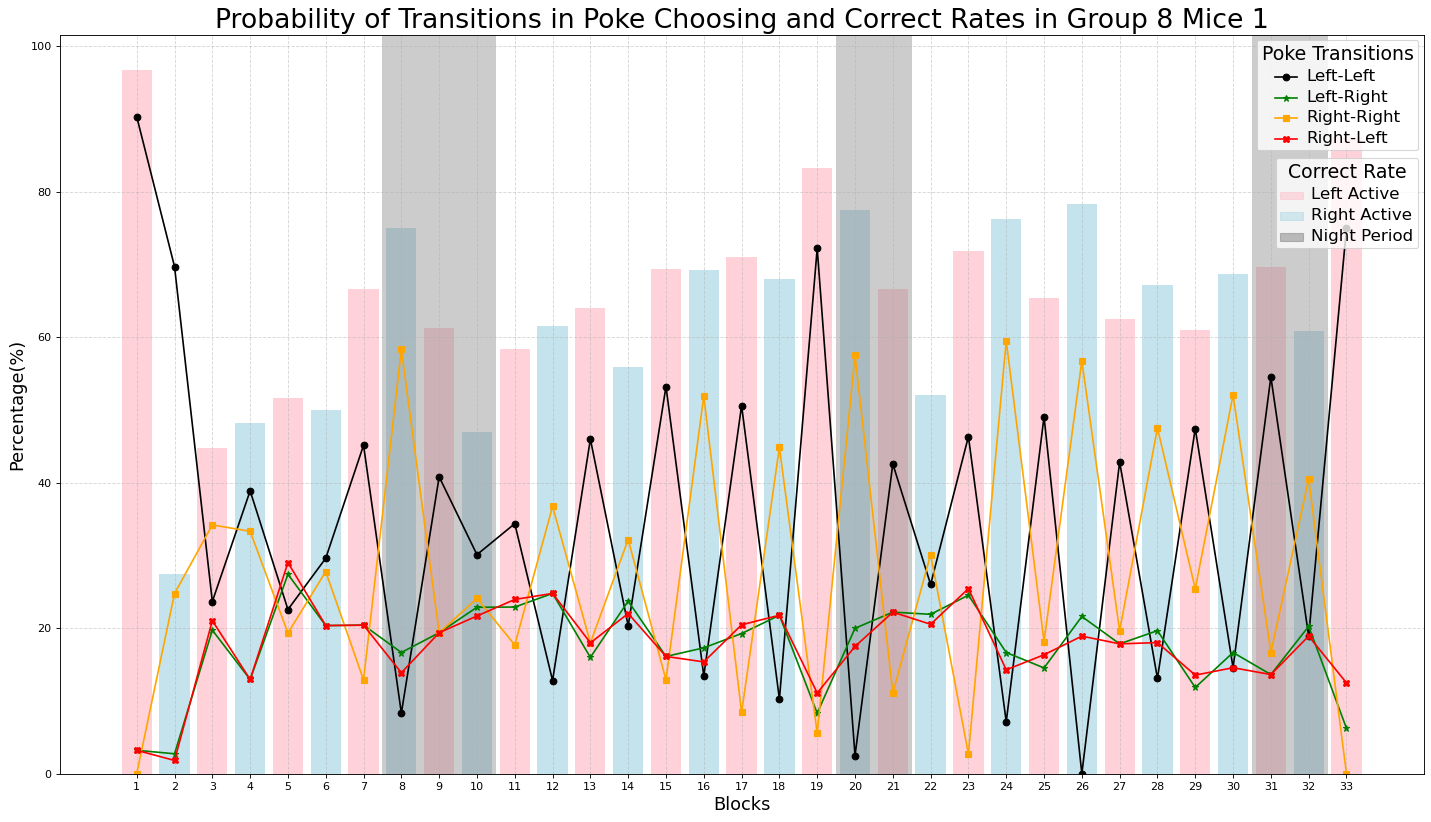

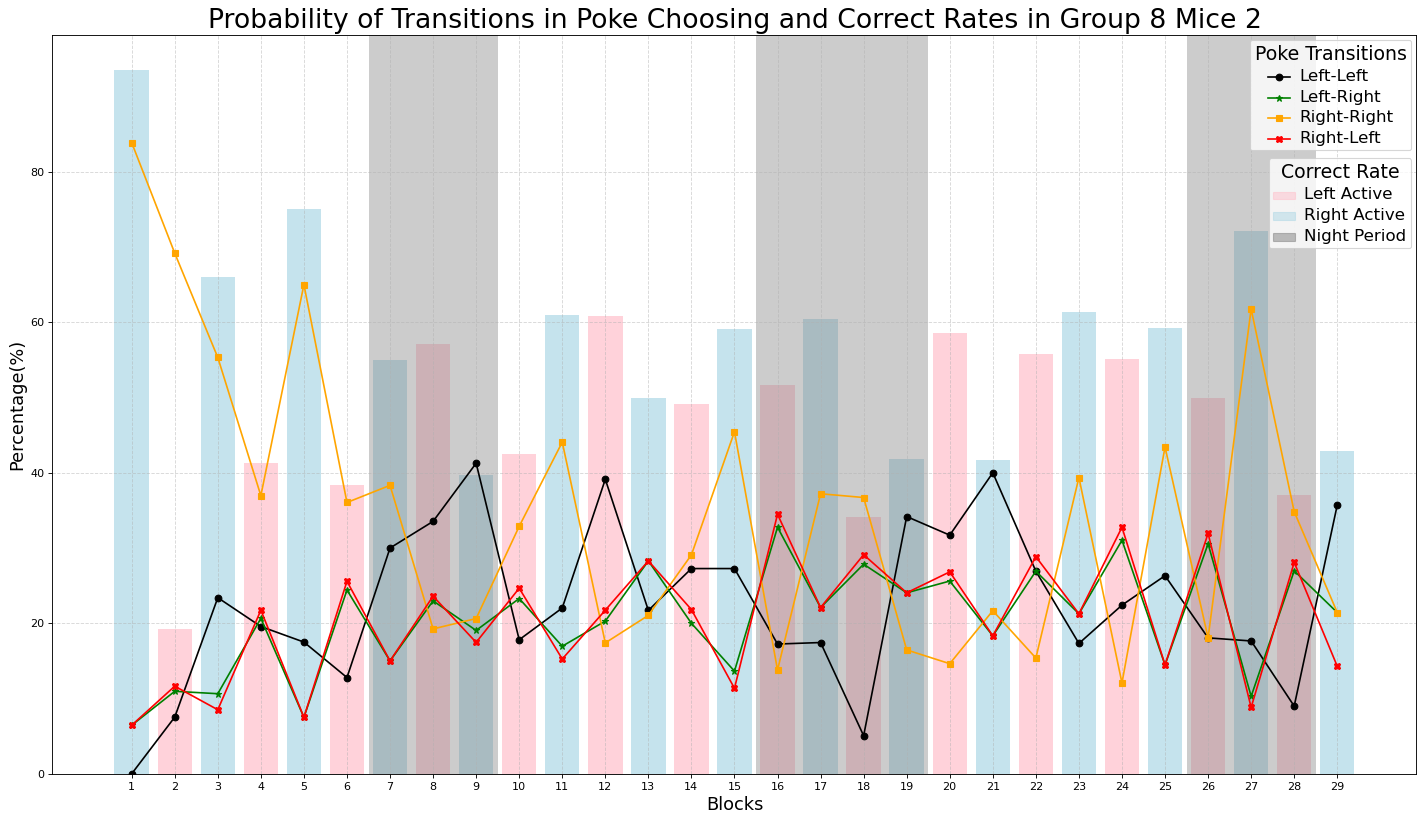

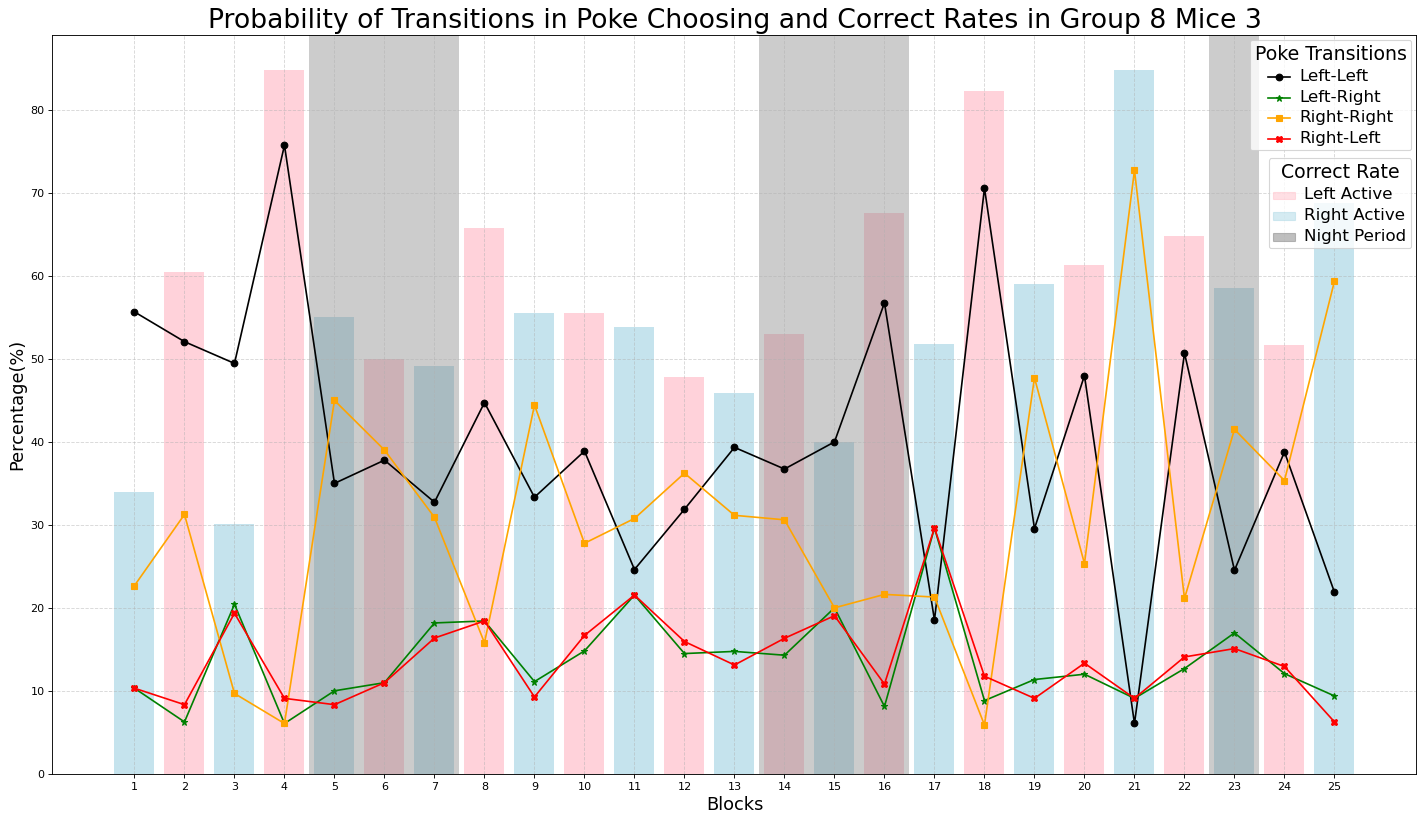

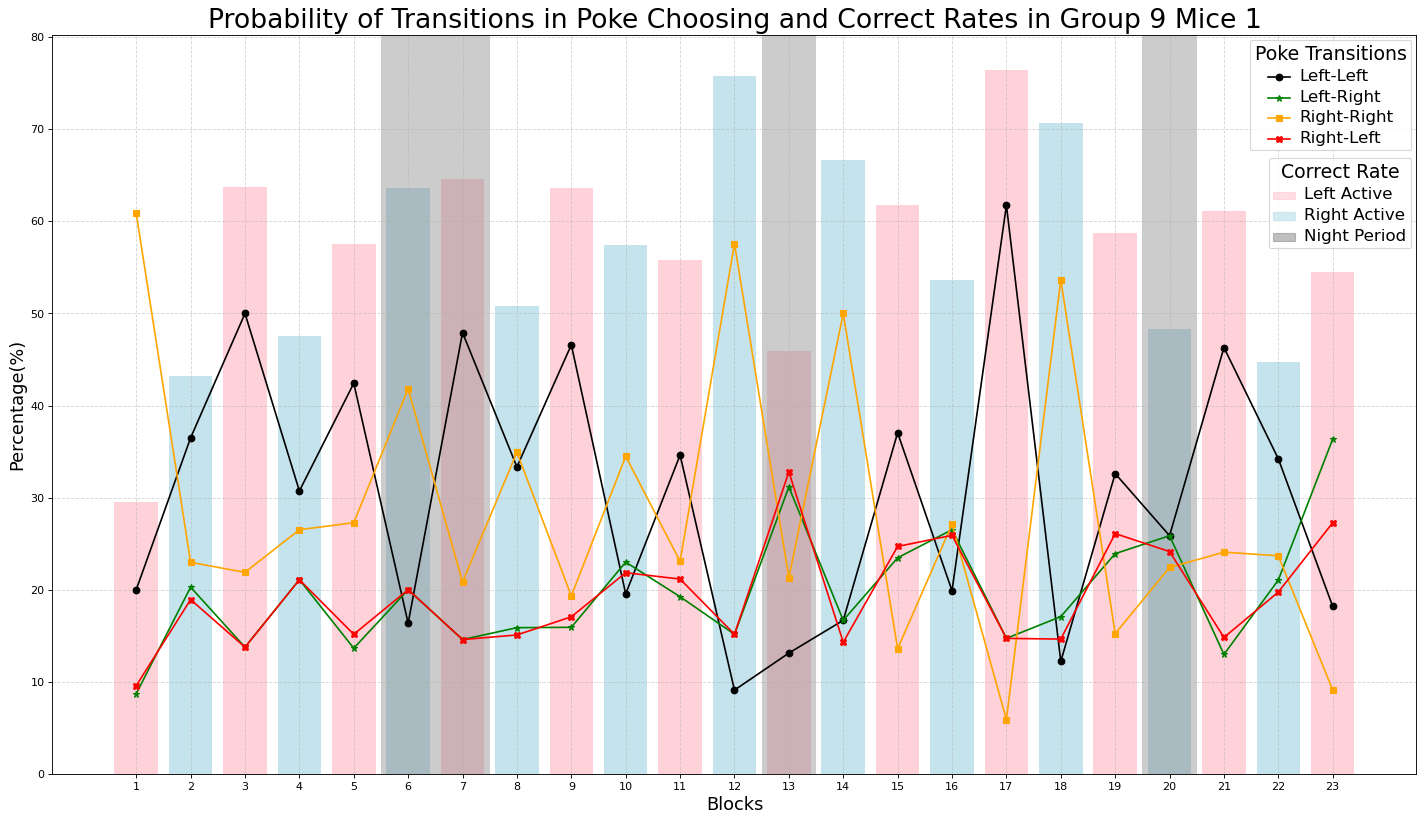

In [3]:
for path in paths.contigency_flip_cask:
    data_dropped = dit.csv_read_clean(path=path)
    blocks = dit.split_data_to_blocks(data_dropped)
    data_stats = dit.get_transition_info(blocks)
    dit.graph_tranition_csv(data_stats, blocks, path)

* In flipping poke case, we find that there is left or right stage (mice display a tendency to stick to one direction)
* there is only one stage at a time, and transition can take some times (1-2 stage to move to another)
* Generally, the accuracy is improved (>50~60% at the end and higher than the beginning)

In [3]:
path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

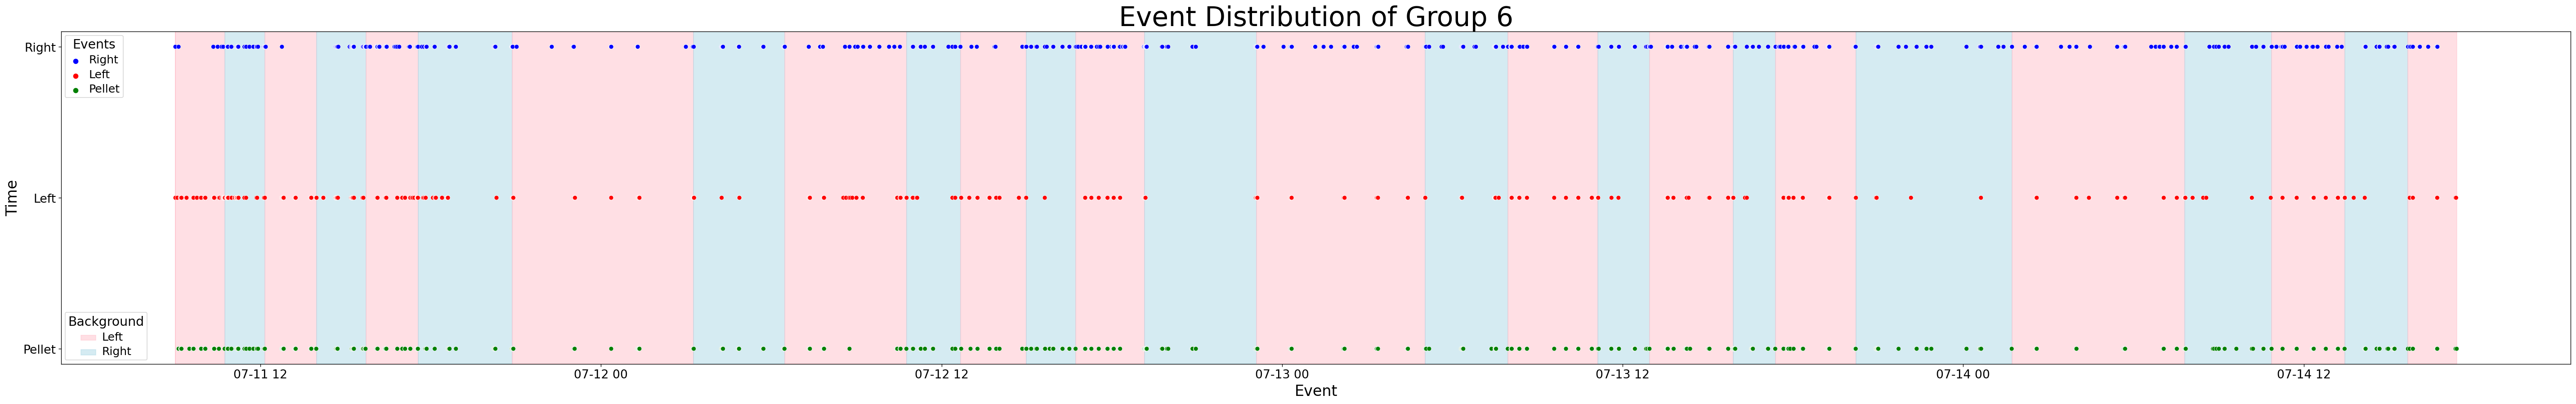

In [29]:
colors = {'Left': 'red', 'Right': 'blue', 'Pellet': 'green'}

# Create a custom background for alternating 'Left' and 'Right' values
fig, ax = plt.subplots(figsize=(60, 8))
sns.scatterplot(data=data_dropped, x='Time_Stamp', y='Event',
                hue='Event', palette=colors, ax=ax, zorder=2)

# Fill the background with pink for 'Left' and blue for 'Right'
left_color = 'pink'
right_color = 'lightblue'

# Find regions where 'Active_Poke' is continuous for at least 10 time stamps
active_regions = []
current_region = data_dropped['Time_Stamp'][0]
current_poke = None
for idx, row in data_dropped.iterrows():
    # if last element equal to current, we expand current region
    if current_poke == row['Active_Poke']:
        continue
    # change in value, we move current to active_regions, and reset current region
    else:
        color = 'pink' if data_dropped['Active_Poke'].loc[data_dropped['Time_Stamp']
                                                          == current_region].iloc[0] == 'Left' else 'lightblue'
        ax.axvspan(current_region, row['Time_Stamp'],
                   color=color, alpha=0.5, zorder=1)

        current_region = row['Time_Stamp']

        current_poke = 'Left' if current_poke == 'Right' else 'Right'

color = 'pink' if data_dropped['Active_Poke'].loc[data_dropped['Time_Stamp']
                                                  == current_region].iloc[0] == 'Left' else 'lightblue'
ax.axvspan(current_region, data_dropped['Time_Stamp'][len(
        data_dropped['Time_Stamp']) - 1], color=color, alpha=0.5, zorder=1)

# Define legend patches and labels for the background colors
left_patch = mpatches.Patch(color='pink', alpha=0.5, label='Left')
right_patch = mpatches.Patch(color='lightblue', alpha=0.5, label='Right')

# save a copy for original legend and create new legend for bg-color
legend = plt.legend(title='Events', loc='upper left')
leg_bg = plt.legend(handles=[left_patch, right_patch], loc='lower left')

# set style for new legend
leg_bg.set_title('Background')
leg_bg.get_title().set_fontsize('17')
leg_bg.get_texts()[0].set_fontsize('15')
leg_bg.get_texts()[1].set_fontsize('15')

# Combine the legends into one
ax = plt.gca()
ax.add_artist(legend)

# set original legend style
legend.get_title().set_fontsize('17')
legend.get_texts()[0].set_fontsize('15')
legend.get_texts()[1].set_fontsize('15')
legend.get_texts()[2].set_fontsize('15')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Event Distribution of Group 6', fontsize=36)
plt.xlabel('Event', fontsize=20)
plt.ylabel('Time', fontsize=20)
plt.show()
